In [125]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import networkx.algorithms.community as nxcom
import itertools

In [175]:
#A04.1 Community detection
#Load data
g_dolphins = nx.read_gml("data/graph_dolphins.gml")
g_jazz = nx.read_gml("data/graph_jazz_collab.gml")
g_karate = nx.read_gml("data/graph_karate.gml")

# (a) the greedy modularity maximization by Clauset Newman and Moore
greedy_dolphins = nxcom.greedy_modularity_communities(g_dolphins)
greedy_jazz = nxcom.greedy_modularity_communities(g_jazz)
greedy_karate = nxcom.greedy_modularity_communities(g_karate)

# (b)  the Girvan-Newman algorithm
gir_dolphins = nxcom.girvan_newman(g_dolphins)
gir_jazz = nxcom.girvan_newman(g_jazz)
gir_karate = nxcom.girvan_newman(g_karate)

In [119]:
#Greedy
def plot_graph(G, community, num, title):
    

    if num == 3:
        nodesred, nodesblue, nodesgreen = community
        for v in G.nodes():
            if v in nodesred:
                G.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                G.nodes[v]['color'] = 'blue'
            elif v in nodesgreen:
                G.nodes[v]['color'] = 'green'
    elif num == 4:
        nodesred, nodesblue, nodesgreen, nodesyellow = community
        for v in G.nodes():
            if v in nodesred:
                G.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                G.nodes[v]['color'] = 'blue'
            elif v in nodesgreen:
                G.nodes[v]['color'] = 'green'
            elif v in nodesyellow:
                G.nodes[v]['color'] = 'yellow'
    
    nx.draw(G,node_color = [G.nodes[v]['color'] for v in G.nodes()],  node_size = 100)
    plt.title(title)

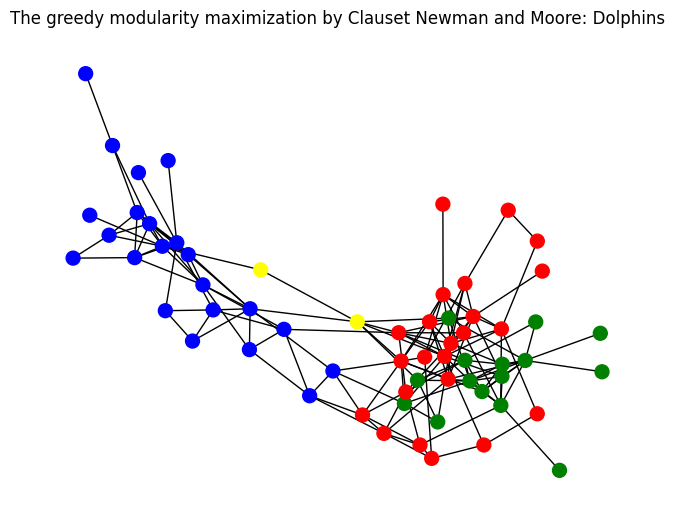

In [120]:
plot_graph(g_dolphins, greedy_dolphins, len(greedy_dolphins), "The greedy modularity maximization by Clauset Newman and Moore: Dolphins")

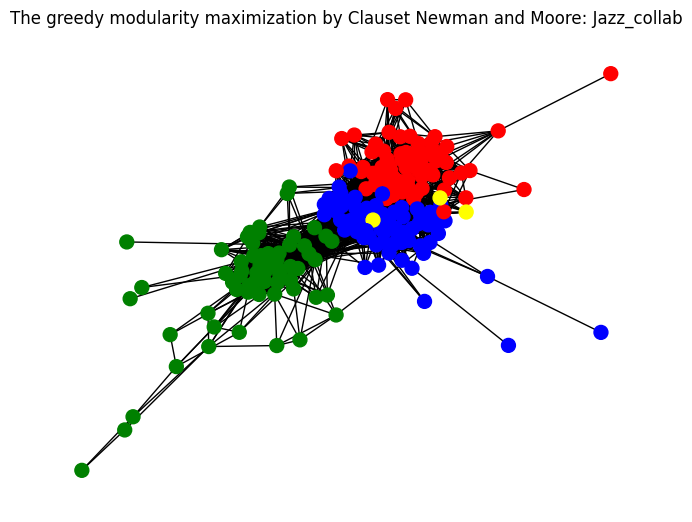

In [121]:
plot_graph(g_jazz, greedy_jazz, len(greedy_jazz), "The greedy modularity maximization by Clauset Newman and Moore: Jazz_collab")

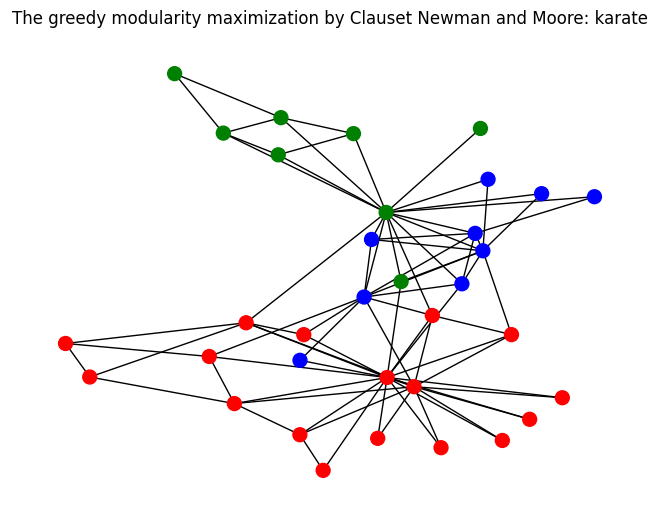

In [122]:
plot_graph(g_karate, greedy_karate, len(greedy_karate), "The greedy modularity maximization by Clauset Newman and Moore: karate")

In [177]:
#Girvan
#nxcom.modularity(gir_dolphins)
def get_comp(graph, gir):
    communities = []
    modularities = []
    k = 2 
    for comp in itertools.islice(gir, k):
        communities.append(tuple(sorted(c) for c in comp))
        modularities.append(nxcom.modularity(graph, tuple(sorted(c) for c in comp)))
    
    max_m = 0
    index = -1
    for i in range(len(modularities)):
        if modularities[i] > max_m:
            max_m = modularities[i]
            index = i
    
    
    #print(len(communities[index]))
    return communities[index]    

def plot_girvan(graph, gir,title):
    community = get_comp(graph, gir)
    if len(community) == 2:
        nodesred, nodesblue = community
        for v in graph.nodes():
            if v in nodesred:
                graph.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                graph.nodes[v]['color'] = 'blue'
    elif len(community) == 3:
        nodesred, nodesblue, nodesgreen = community
        for v in graph.nodes():
            if v in nodesred:
                graph.nodes[v]['color'] = 'red'
            elif v in nodesblue:
                graph.nodes[v]['color'] = 'blue'
            elif v in nodesgreen:
                graph.nodes[v]['color'] = 'green'
    nx.draw(graph,node_color = [graph.nodes[v]['color'] for v in graph.nodes()],  node_size = 100)
    plt.title(title)


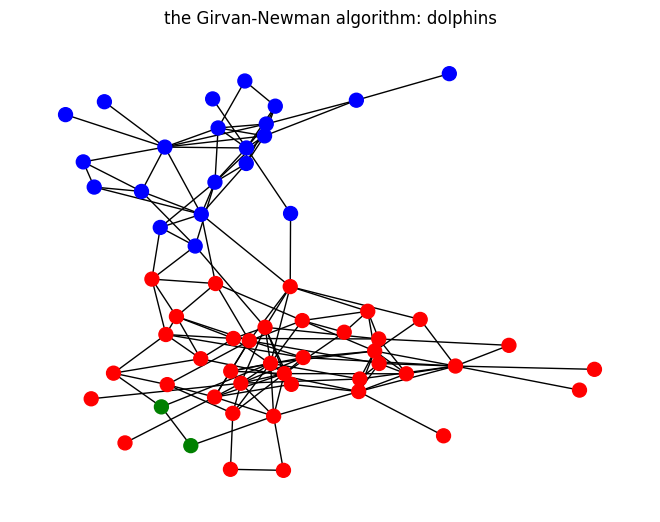

In [169]:
plot_girvan(g_dolphins, gir_dolphins, "the Girvan-Newman algorithm: dolphins")

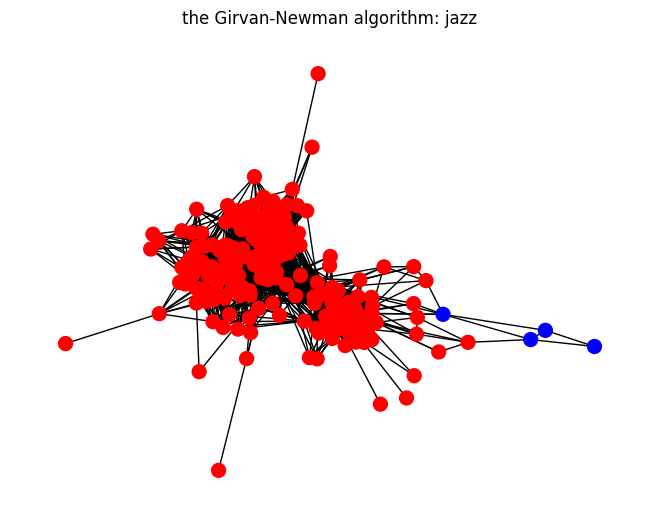

In [170]:
plot_girvan(g_jazz, gir_jazz, "the Girvan-Newman algorithm: jazz")

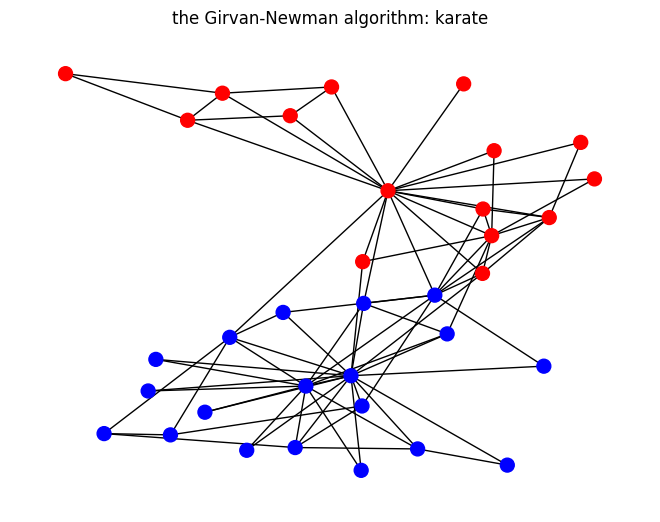

In [171]:
plot_girvan(g_karate, gir_karate, "the Girvan-Newman algorithm: karate")

In [174]:
#Compare with Randomise
grnd_dolphins = nx.algorithms.smallworld.random_reference(g_dolphins,niter = 20, connectivity=False)
grnd_jazz = nx.algorithms.smallworld.random_reference(g_jazz,niter = 20, connectivity=False)
grnd_karate = nx.algorithms.smallworld.random_reference(g_karate,niter = 20, connectivity=False)

# (a) the greedy modularity maximization by Clauset Newman and Moore
r_greedy_dolphins = nxcom.greedy_modularity_communities(grnd_dolphins)
r_greedy_jazz = nxcom.greedy_modularity_communities(grnd_jazz)
r_greedy_karate = nxcom.greedy_modularity_communities(grnd_karate)

# (b)  the Girvan-Newman algorithm
r_gir_dolphins = nxcom.girvan_newman(grnd_dolphins)
r_gir_jazz = nxcom.girvan_newman(grnd_jazz)
r_gir_karate = nxcom.girvan_newman(grnd_karate)

In [140]:
# (a) the greedy modularity maximization by Clauset Newman and Moore
print("Dolphins: Communities before randomize: " + str(len(greedy_dolphins)) + " & Communities after randomize: " + str(len(r_greedy_dolphins)))
print("Jazz: Communities before randomize: " + str(len(greedy_jazz)) + " & Communities after randomize: " + str(len(r_greedy_jazz)))
print("Karate: Communities before randomize: " + str(len(greedy_karate)) + " & Communities after randomize: " + str(len(r_greedy_karate)))

Dolphins: Communities before randomize: 4 & Communities after randomize: 5
Jazz: Communities before randomize: 4 & Communities after randomize: 5
Karate: Communities before randomize: 3 & Communities after randomize: 5


In [176]:
# (b)  the Girvan-Newman algorithm
print("Dolphins: Communities before randomize: " + str(len(get_comp(g_dolphins, gir_dolphins))) + " & Communities after randomize: " + str(len(get_comp(grnd_dolphins, r_gir_dolphins))))
print("Jazz: Communities before randomize: " + str(len(get_comp(g_jazz, gir_jazz))) + " & Communities after randomize: " + str(len(get_comp(grnd_jazz, r_gir_jazz))))
print("Karate: Communities before randomize: " + str(len(get_comp(g_karate, gir_karate))) + " & Communities after randomize: " + str(len(get_comp(grnd_karate, r_gir_karate))))

Dolphins: Communities before randomize: 3 & Communities after randomize: 3
Jazz: Communities before randomize: 2 & Communities after randomize: 3
Karate: Communities before randomize: 2 & Communities after randomize: 3


In [75]:
#A04.2 Erdos-Renyi random networks
#TASK 1 Generate networks
def plot_erdos(k, title):
    G = nx.erdos_renyi_graph(500, k/(500-1))
    color_map = []
    for node in G:
        if node < 10:
            color_map.append('blue')
        else: 
            color_map.append('green')
    pos = nx.spring_layout(G)  
    nx.draw(G, pos=pos, node_color=color_map, node_size = 25)
    plt.title(title)
    plt.show()

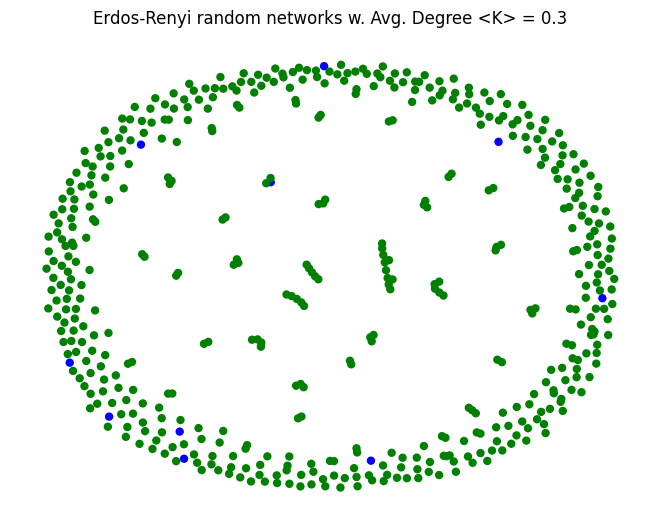

In [76]:
#(a) k = 0.3
plot_erdos(0.3, "Erdos-Renyi random networks w. Avg. Degree <K> = 0.3")

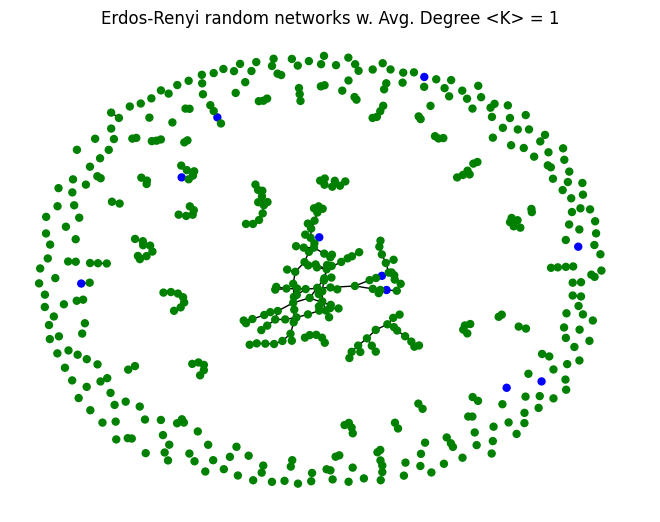

In [77]:
#(b) k = 1
plot_erdos(1, "Erdos-Renyi random networks w. Avg. Degree <K> = 1")

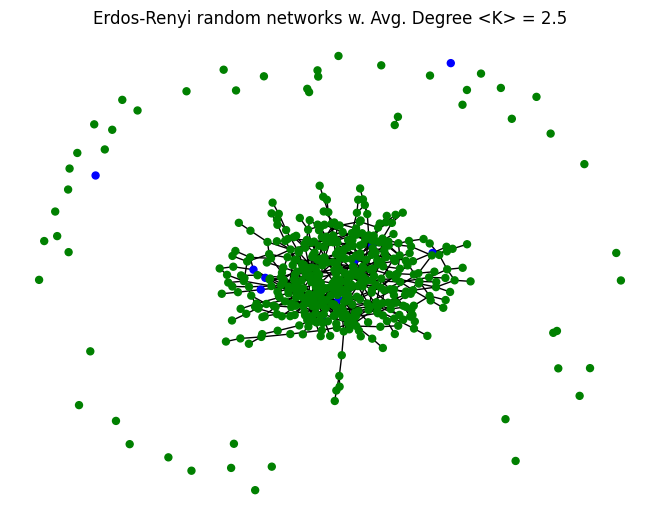

In [78]:
#(c) k = 2.5
plot_erdos(2.5, "Erdos-Renyi random networks w. Avg. Degree <K> = 2.5")

In [81]:
#TASK 2
#1. Plot the average fraction of nodes in the largest connected component ⟨𝑁𝐺/𝑁⟩ as a function of 𝑝 and mark with a vertical line the critical probability

p_values = np.logspace(np.log10(0.001), np.log10(1), 200)
NG = []
C = []

for i in p_values:
    tmp_NG = []
    tmp_C = []
    for j in range(101):
        graph = nx.erdos_renyi_graph(200, i)
        # Largest Connected Component
        tmp_NG.append(len(max([c for c in nx.connected_components(graph)],key=len))/200)
        tmp_C.append(nx.average_clustering(graph))
    NG.append(sum(tmp_NG)/len(tmp_NG))
    C.append(sum(tmp_C)/len(tmp_C))


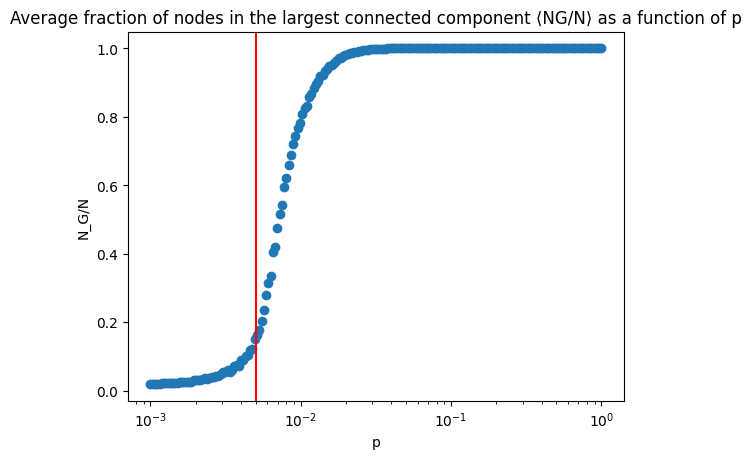

In [94]:
plt.scatter(p_values, NG)
plt.xlabel("p")
plt.ylabel("N_G/N")
plt.title("Average fraction of nodes in the largest connected component ⟨NG/N⟩ as a function of p")
plt.xscale("log")
plt.axvline(1/200, color = 'r', label = 'critical probability')
plt.show()

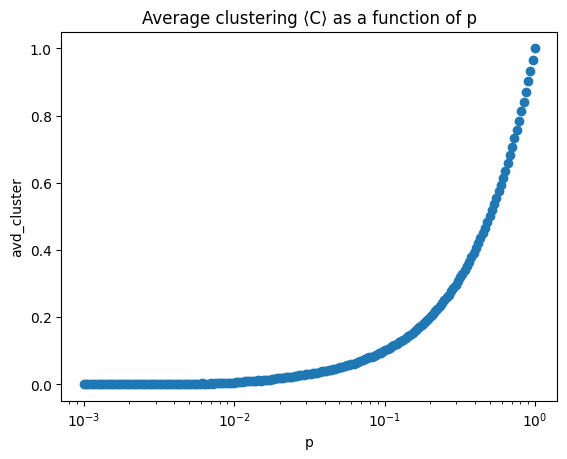

In [93]:
#2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result
plt.scatter(p_values, C)
plt.xlabel("p")
plt.ylabel("avd_cluster")
plt.title("Average clustering ⟨C⟩ as a function of p")
plt.xscale("log")
plt.show()

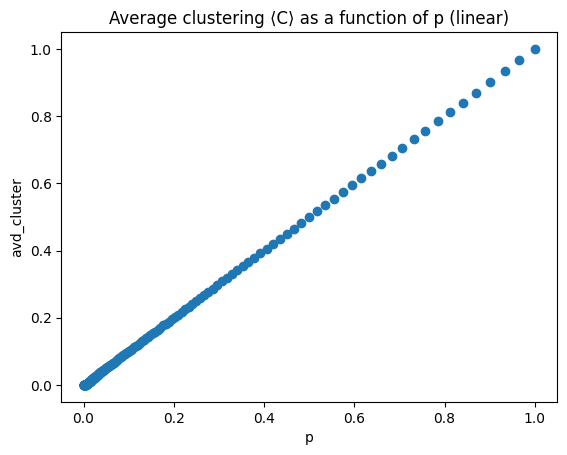

In [178]:
plt.scatter(p_values, C)
plt.xlabel("p")
plt.ylabel("avd_cluster")
plt.title("Average clustering ⟨C⟩ as a function of p (linear)")
#plt.xscale("log")
plt.show()

Interpretation: the average clustering appears a linear relationship with probabilities. 

In [99]:
#A04.3 Small-world with high clustering
sp_values = np.logspace(np.log10(0.001), np.log10(1), 150)
Cp_C0 = []
Dp_D0 = []
ana_Cp_C0 = []
#2k=12
k = 6
count = 0

for i in sp_values:
    tmp_Cp = []
    tmp_Dp = []
    tmp_C0 = []
    tmp_D0 = []
    for j in range(101):
        graph = nx.watts_strogatz_graph(150, k, i)
        graph0 = nx.watts_strogatz_graph(150, k, 0)
        
        tmp_Cp.append(nx.average_clustering(graph))
        tmp_C0.append(nx.average_clustering(graph0))
        tmp_Dp.append(nx.average_shortest_path_length(graph))
        tmp_D0.append(nx.average_shortest_path_length(graph0))
    
    Cp_C0.append((sum(tmp_Cp)/len(tmp_Cp))/(sum(tmp_C0)/len(tmp_C0)))
    Dp_D0.append((sum(tmp_Dp)/len(tmp_Dp))/(sum(tmp_D0)/len(tmp_D0)))
    analytical = ((3*(k - 1)) * ((1 - i)**3))/(2 * (2 * k - 1))
    ana_Cp_C0.append(analytical/(sum(tmp_C0)/len(tmp_C0)))

    #only display 20 results
    if count < 20:
        print("Cp: " + str(sum(tmp_Cp)/len(tmp_Cp)) + " | Analytical: " + str(analytical))
        count = count + 1



Cp: 0.5983976111896897 | Analytical: 0.6797747720454546
Cp: 0.5988407983655505 | Analytical: 0.6796779092804587
Cp: 0.5978239823982395 | Analytical: 0.6795764600279198
Cp: 0.5983030017287436 | Analytical: 0.6794702076068726
Cp: 0.598444444444444 | Analytical: 0.6793589251473635
Cp: 0.5977567185289951 | Analytical: 0.6792423751159836
Cp: 0.5978117240295451 | Analytical: 0.6791203088197633
Cp: 0.5976583372622967 | Analytical: 0.6789924658874852
Cp: 0.5977982083922673 | Analytical: 0.6788585737274363
Cp: 0.5973930535910724 | Analytical: 0.6787183469605851
Cp: 0.5963894389438937 | Analytical: 0.6785714868281266
Cp: 0.5970463617790344 | Analytical: 0.6784176805723034
Cp: 0.5967879930850218 | Analytical: 0.6782566007893687
Cp: 0.5968495992456383 | Analytical: 0.6780879047535173
Cp: 0.5978019801980192 | Analytical: 0.6779112337105672
Cp: 0.5966291057677187 | Analytical: 0.6777262121401327
Cp: 0.5968379695112359 | Analytical: 0.6775324469849948
Cp: 0.5966646236052167 | Analytical: 0.6773295268

Cp is not consistent with analytical values. The analytical values is higher than Cp values. It is also shown as the figure below. Results from analytical is higher than generated.

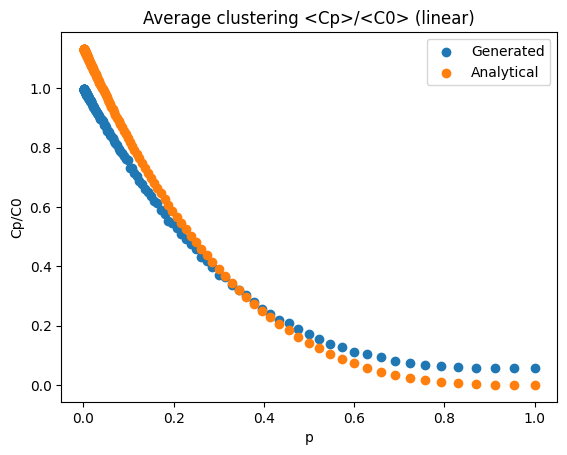

In [182]:
# 1. <Cp> / <C0>
plt.scatter(sp_values, Cp_C0, label = "Generated")
plt.scatter(sp_values, ana_Cp_C0, label = "Analytical")
plt.title("Average clustering <Cp>/<C0> (linear)")
plt.xlabel("p")
plt.ylabel("Cp/C0")
plt.legend()
plt.show()

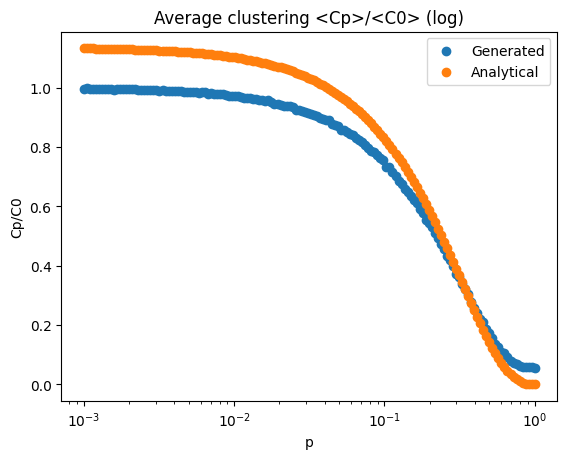

In [107]:
plt.scatter(sp_values, Cp_C0, label = "Generated")
plt.scatter(sp_values, ana_Cp_C0, label = "Analytical")
plt.title("Average clustering <Cp>/<C0> (log)")
plt.xlabel("p")
plt.ylabel("Cp/C0")
plt.xscale("log")
plt.legend()
plt.show()

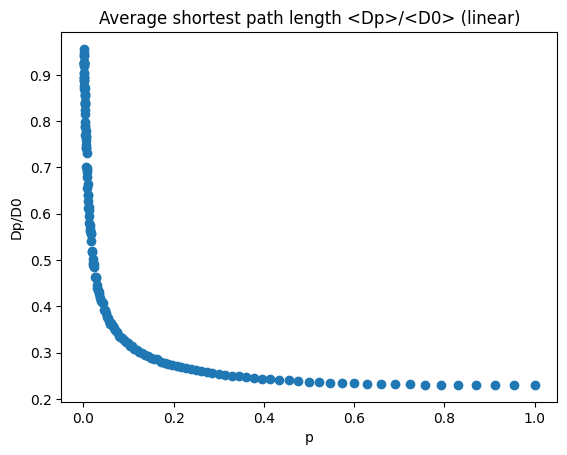

In [180]:
#2. <Dp> / <D0>
plt.scatter(sp_values, Dp_D0)
plt.title("Average shortest path length <Dp>/<D0> (linear)")
plt.xlabel("p")
plt.ylabel("Dp/D0")
plt.show()

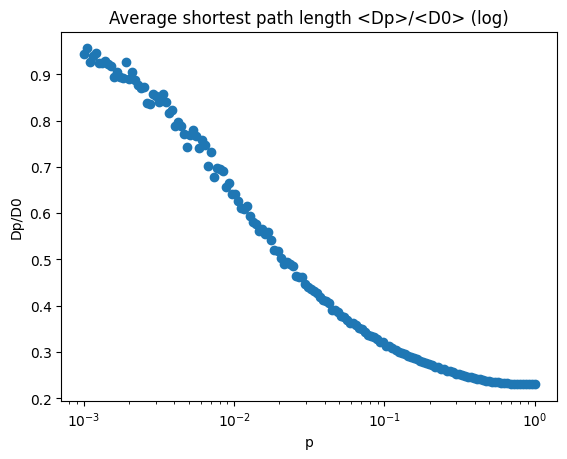

In [181]:

plt.scatter(sp_values, Dp_D0)
plt.title("Average shortest path length <Dp>/<D0> (log)")
plt.xlabel("p")
plt.ylabel("Dp/D0")
plt.xscale("log")
plt.show()